In [3]:
from anyBSM import anyBSM
import numpy as np
import logging
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rcParams['font.size'] = 19

In [6]:
anyBSM.built_in_models

{'SSM': '/Users/konda/FeynTools/kappa_lambda_general/anyBSM/models/SSM',
 'SM': '/Users/konda/FeynTools/kappa_lambda_general/anyBSM/models/SM',
 'THDM-inert': '/Users/konda/FeynTools/kappa_lambda_general/anyBSM/models/THDM-inert',
 'BmLSM': '/Users/konda/FeynTools/kappa_lambda_general/anyBSM/models/BmLSM',
 'THDMII': '/Users/konda/FeynTools/kappa_lambda_general/anyBSM/models/THDMII',
 'N2HDM': '/Users/konda/FeynTools/kappa_lambda_general/anyBSM/models/N2HDM',
 'GeorgiMachacek': '/Users/konda/FeynTools/kappa_lambda_general/anyBSM/models/GeorgiMachacek',
 'MSSM': '/Users/konda/FeynTools/kappa_lambda_general/anyBSM/models/MSSM',
 'TSM_Yeq1': '/Users/konda/FeynTools/kappa_lambda_general/anyBSM/models/TSM_Yeq1',
 'TSM_Yeq0': '/Users/konda/FeynTools/kappa_lambda_general/anyBSM/models/TSM_Yeq0'}

In [7]:
# init model in OS scheme
THDM = anyBSM(
    anyBSM.built_in_models['THDMII'], # load the SM
    scheme_name = "OS", # load the OS scheme
    progress = False, # dont show any progress bars
    caching = 2, # enable the cache
    quiet=True
)

In [9]:
THDM.setparameters({'M': 20000, 'Mh2': 20000, 'MAh2': 20000, 'MHm2': 20000, 'SinBmA': 1.0})

In [10]:
THDM.lambdahhh(), np.sum(THDM.lambdahhh())

first run
evaluation mode: abbreviations


evaluation mode: analytical
first run
evaluation mode: abbreviations
first run
evaluation mode: abbreviations
first run
evaluation mode: abbreviations
first run
evaluation mode: abbreviations
first run
evaluation mode: abbreviations
first run
evaluation mode: abbreviations
first run
evaluation mode: abbreviations


(((187.28177740693116-0j),
  (-10.131454664364647-0j),
  (3.7546765421191943-0j),
  (-128426.59973726839-0j),
  (256847.01973808842+0j),
  (-128424.56614940507+0j),
  0),
 (176.75885069963988+0j))

In [6]:
np.sum(SM.lambdahhh())

(176.75884480423028+0j)

In [12]:
# calculate lambda with all CT contributions
(treelevel,
 genuine,
 wfr,
 tadpoles,
 vevct,
 massct,
 customct) = SM.lambdahhh(simplify=False)

In [31]:
print(treelevel) # default: abbreviation-mode: all results are given in terms of the UFO coupling names
SM.treelevel

(187.28177740658242-0j)


'0'

In [12]:
# change renormalization scheme
SM.load_renormalization_scheme('MS')
(treelevelMS,
 genuineMS,
 wfrMS,
 tadpolesMS,
 vevctMS,
 massctMS,
 customctMSb) = SM.lambdahhh(simplify=False)
(vevctMS,massctMS) # this is empty since we are in the MS scheme
genuineMS == genuine # but the genuine diagrams are of course identical to those in the OS scheme

found the following SM(-like) particles:
Higgs-Boson (h): (Mass Mh = 125.1)
W-Boson (Wp): (Mass MWp = 80.379)
Z-Boson (Z): (Mass MZ = 91.187)
Photon (A): (Mass ZERO = 0.0)
Top-Quark (u3): (Mass Mu3 = 171.2)
Bottom-Quark (d3): (Mass Md3 = 4.2)
Charm-Quark (u2): (Mass Mu2 = 1.27)
Strange-Quark (d2): (Mass Md2 = 0.104)
Up-Quark (u1): (Mass Mu1 = 0.0015)
Down-Quark (d1): (Mass Md1 = 0.0035)
Tau-Lepton (e3): (Mass Me3 = 1.776)
Muon-Lepton (e2): (Mass Me2 = 0.105)
Electron-Lepton (e1): (Mass Me1 = 0.000511)

Found the following SM input parameters:
VEV (vvSM): (2*MWp*cmath.sqrt(1 - MWp**2/MZ**2))/el
alphaQEDinverse (aEWM1): 137.035999679
alphaQCD (aS): 0.119
GFermi (GFermi): 1.1663787e-05
Dalpha (Dalpha): 0.059157687



True

In [13]:
SM.set_evaluation_mode('analytical') # switch to analytic evaluation mode
SM.sympify(
    SM.Sigma('h', 
             exclude_particles = ['u1','u2','e1','e2','e3','d1','d2','d3']
            )
#    , simplify = False) # Higgs boson selfenergy

determine all insertions for hh-amplitude for all topologies.
45 (potentially) non-zero diagrams to calculate found.
Calculate all diagrams for hh-amplitude analytical  (turn off `simplify` if this takes to long for you).


In [17]:
SM.caching=2 # turn on caching
SM.quiet=True # be quiet
SM.progess=False # don't show any progress bars
SM.load_renormalization_scheme('OS') # back to the OS scheme
SM.evaluation="numerical" # evaluate the contributions numerically
SM.setparameters() # initialize all couplings with the default numerical values from the UFO file
SM.lambdahhh() # (tree-level, genuine-one-loop, WFR, tadpoles, MassCTs, VEVCT, customCT)

((187.28177740658242-0j),
 (65.56939533827376-0j),
 (-9.733446577137315-0j),
 (-52.18130251087813-0j),
 (32.13439132003587+0j),
 (-47.09093926831895+0j),
 0)

In [15]:
# function for selfenergy (and its derivative)
print(SM.Sigma('h'))
print(SM.Sigmaprime('h'))

(-1697.5920646484053+0j)
(0.013537421310225794+0j)


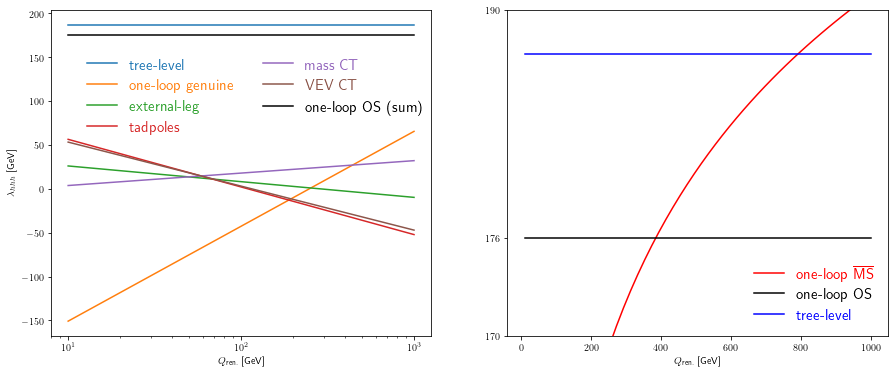

In [16]:
# lets vary the renormalization scale
def lambdahhhQ(Q):
    SM.setparameters(params={'Qren': Q,'Mu3': 173.1})
    return SM.lambdahhh()

Qvals= np.linspace(start=10,stop=1000, num=50)

# first in the OS scheme
SM.load_renormalization_scheme('OS')
lamvals = np.array(list(map(lambdahhhQ,Qvals)))

# then in the MS scheme
SM.load_renormalization_scheme('MS')
lamvalsMS = np.array(list(map(lambdahhhQ,Qvals)))

labels = {0: 'tree-level', 1: 'one-loop genuine', 2: 'external-leg', 3: 'tadpoles', 4: 'mass CT', 5: 'VEV CT'}
fig, ax = plt.subplots(1,2,sharex=False,sharey=False,figsize=(15,6))
for i in range(6):
    ax[0].plot(Qvals,lamvals.transpose()[i].real, label = labels[i])
ax[0].plot(Qvals,sum([lamvals.transpose()[i] for i in range(6)]).real, label = 'one-loop OS (sum)', color='black')
ax[0].set_xlabel(r'$Q_{\text{ren.}}\,\,\text{[GeV]}$')
ax[0].set_ylabel(r'$\lambda_{hhh}\,\,\text{[GeV]}$')
# ax.axes.axhline(lambda0.real, color='green',label="tree-level")
ax[0].set_xscale('log')
ax[0].legend(**{'loc': [0.08, 0.6], 'fontsize': 15, 'fancybox': False, 'ncol': 2, 'frameon': False, 'labelcolor': 'linecolor'})

ax[1].plot(Qvals,sum([lamvalsMS.transpose()[i] for i in range(6)]).real, label = r'one-loop $\overline{\text{MS}}$',color='red')
ax[1].plot(Qvals,sum([lamvals.transpose()[i] for i in range(6)]).real, label = 'one-loop OS',color='black')
ax[1].plot(Qvals,lamvals.transpose()[0].real, label = 'tree-level',color='blue')
ax[1].set_ylim((170,190))
ax[1].legend(**{'fontsize': 15, 'fancybox': False, 'ncol': 1, 'frameon': False, 'labelcolor': 'linecolor'})
ax[1].set_xlabel(r'$Q_{\text{ren.}}\,\,\text{[GeV]}$')
ax[1].set_yticks([170,176.00256611, 190], labels=['$170$','$176$', '$190$'])

In [18]:
sum(lamvals.transpose())  # cancellation is OS scheme is numerically very stable

array([175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j, 175.97987571+0.j, 175.97987571+0.j,
       175.97987571+0.j,

In [15]:
# example plot for MW prediction
SM.caching = 2
def calcMW(mh):
    SM.setparameters({'Mh':mh})
    return SM.MW()
MWvals = np.array(list(map(calcMW,Qvals)))

In [17]:
plt.plot(Qvals,MWvals, color='black',label='SM 1L')
plt.xlabel('$M_h$ [GeV]')
plt.ylabel('$M_W$ [GeV]')
plt.legend()